# Convolutional Neural Network (CNN)

Following content discussed through an online [article](https://www.analyticsvidhya.com/blog/2022/03/basics-of-cnn-in-deep-learning/)

# Image Classification with CNN on CIFAR-10 Dataset



The CIFAR-10 dataset contains 60,000 32x32 color images across 10 object categories:
- Airplane, Automobile, Bird, Cat, Deer, Dog, Frog, Horse, Ship, Truck

We'll manually build a Convolutional Neural Network (CNN) using Keras to classify these images.

In [ ]:
!pip install tensorflow

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model

In [ ]:
# Load data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 23s 0us/step


In [ ]:
# Class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

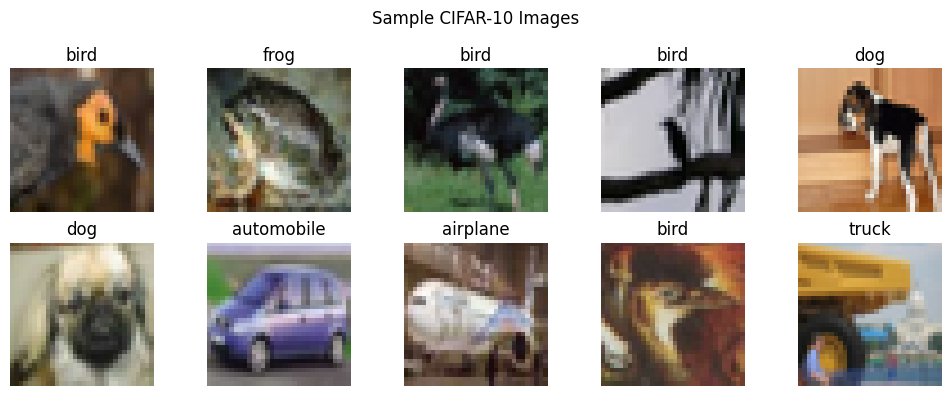

In [ ]:
plt.figure(figsize=(10, 4))
for i in range(10):
    idx = np.random.randint(0, x_train.shape[0])
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[idx])
    plt.title(class_names[np.argmax(y_train[idx])])
    plt.axis('off')
plt.suptitle("Sample CIFAR-10 Images")
plt.tight_layout()
plt.show()

### Defining NN model through Keras Functional API



Earlier we had defined our model through `Keras Sequential` method as follows:

    model = Sequential([
        Input(shape=(32, 32, 3)),

        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),

        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),

        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),

        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])

Next, we will define this same model through `Keras Functional API` in next cell

In [ ]:
inputs = Input(shape=(32, 32, 3))

x = Conv2D(32, (3, 3), activation='relu', name='conv1')(inputs)
x = MaxPooling2D((2, 2), name='pool1')(x)

x = Conv2D(64, (3, 3), activation='relu', name='conv2')(x)
x = MaxPooling2D((2, 2), name='pool2')(x)

x = Conv2D(128, (3, 3), activation='relu', name='conv3')(x)
x = MaxPooling2D((2, 2), name='pool3')(x)

x = Flatten(name='flatten')(x)
x = Dense(128, activation='relu', name='dense1')(x)

outputs = Dense(10, activation='softmax', name='output')(x)

model = Model(inputs, outputs)

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool1 (MaxPooling2D)            │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool2 (MaxPooling2D)            │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3 (Conv2D)                  │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool3 (MaxPooling2D)            │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 160,202 (625.79 KB)

 Trainable params: 160,202 (625.79 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    x_train, y_train,
    epochs=20,
    batch_size=64,
    validation_split=0.2,
    verbose=1
)

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.3119 - loss: 1.8482 - val_accuracy: 0.4952 - val_loss: 1.4000
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5450 - loss: 1.2774 - val_accuracy: 0.5804 - val_loss: 1.2051
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6115 - loss: 1.1029 - val_accuracy: 0.6229 - val_loss: 1.0650
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6571 - loss: 0.9734 - val_accuracy: 0.6573 - val_loss: 1.0087
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.6908 - loss: 0.8917 - val_accuracy: 0.6688 - val_loss: 0.9673
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7143 - loss: 0.8246 - val_accuracy: 0.6801 - val_loss: 0.9229
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7384 - loss: 0.7485 - val_accuracy: 0.6979 - val_loss: 0.8843
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7602 - loss: 0.6887 - val_accuracy: 0

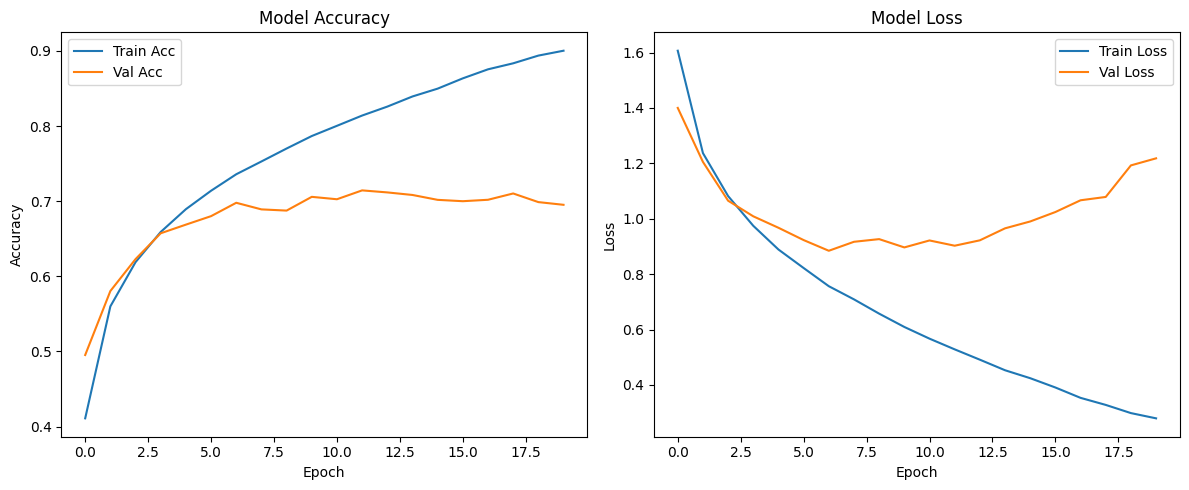

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Evaluate
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")

# Predict
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

Test Accuracy: 0.6963
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


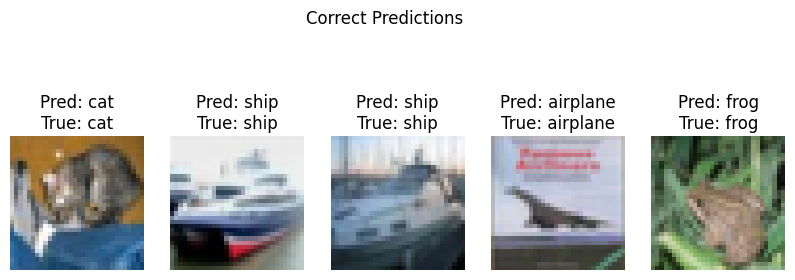

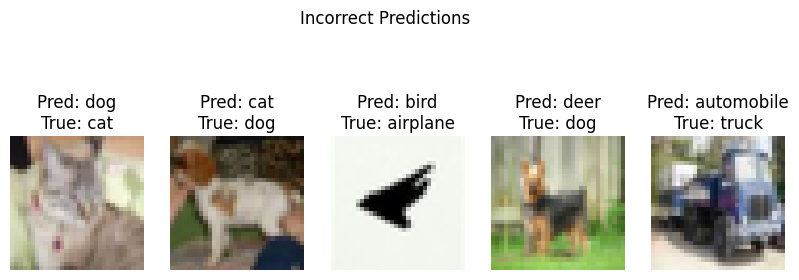

In [ ]:
# Correct and incorrect predictions
correct = np.where(y_pred == y_true)[0]
incorrect = np.where(y_pred != y_true)[0]

# Correct
plt.figure(figsize=(10, 4))
for i, idx in enumerate(correct[:5]):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_test[idx])
    plt.title(f"Pred: {class_names[y_pred[idx]]}\nTrue: {class_names[y_true[idx]]}")
    plt.axis("off")
plt.suptitle("Correct Predictions")
plt.show()

# Incorrect
plt.figure(figsize=(10, 4))
for i, idx in enumerate(incorrect[:5]):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_test[idx])
    plt.title(f"Pred: {class_names[y_pred[idx]]}\nTrue: {class_names[y_true[idx]]}")
    plt.axis("off")
plt.suptitle("Incorrect Predictions")
plt.show()

## Feature Visualization

In [ ]:
# Build activation model for intermediate layer outputs
layer_outputs = [layer.output for layer in model.layers if 'conv' in layer.name or 'pool' in layer.name]
activation_model = Model(inputs=model.input, outputs=layer_outputs)

In [ ]:
# Predict activations on 1 sample
sample_img = x_test[0].reshape(1, 32, 32, 3)
activations = activation_model.predict(sample_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 559ms/step


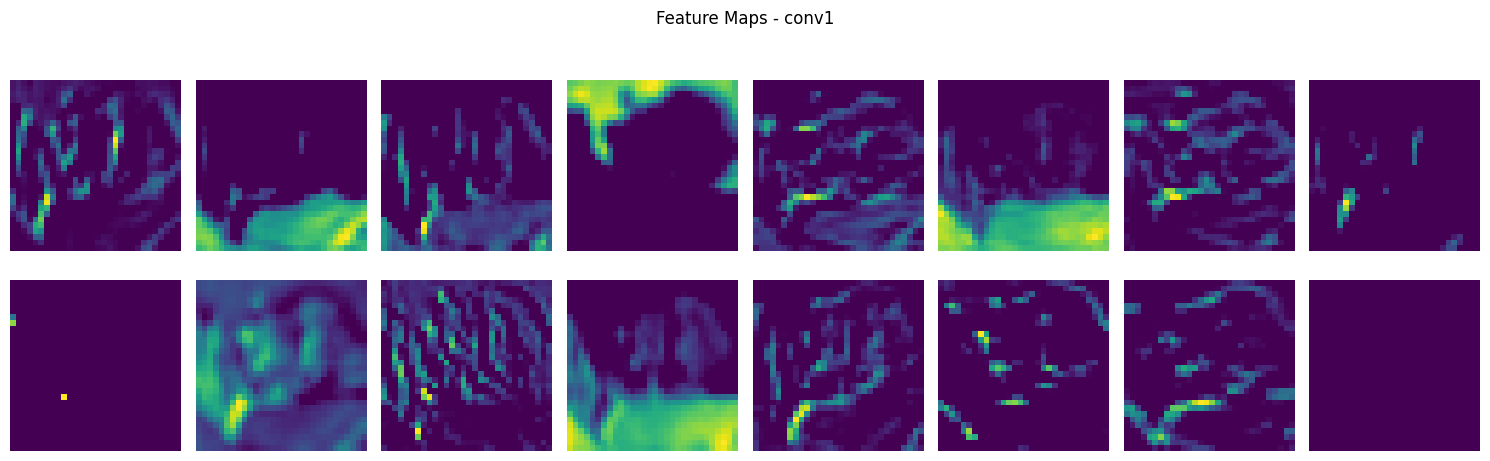

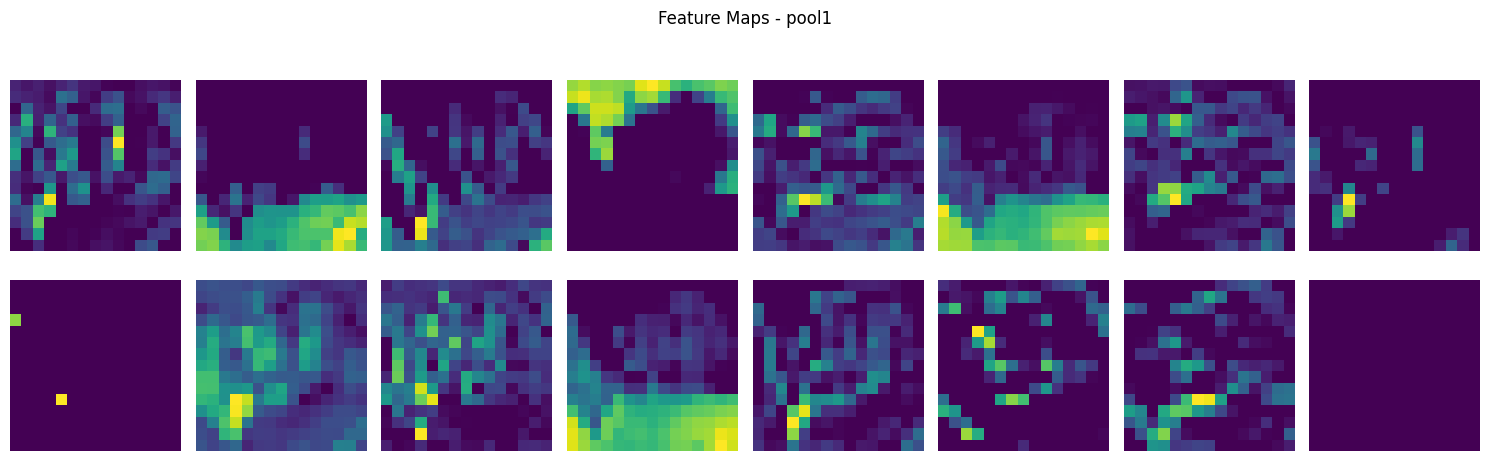

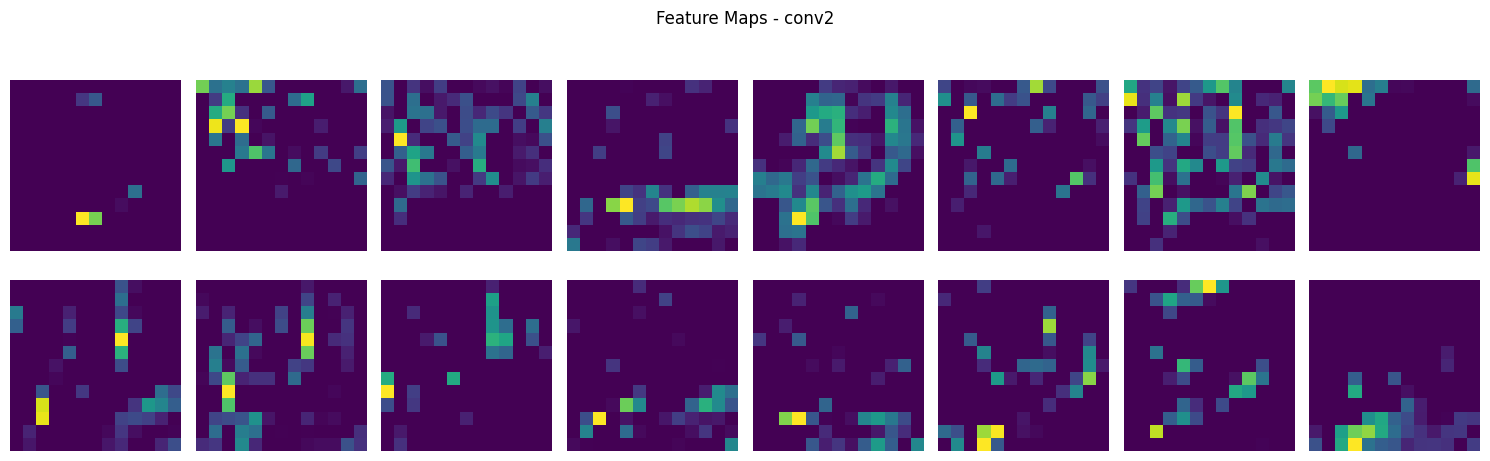

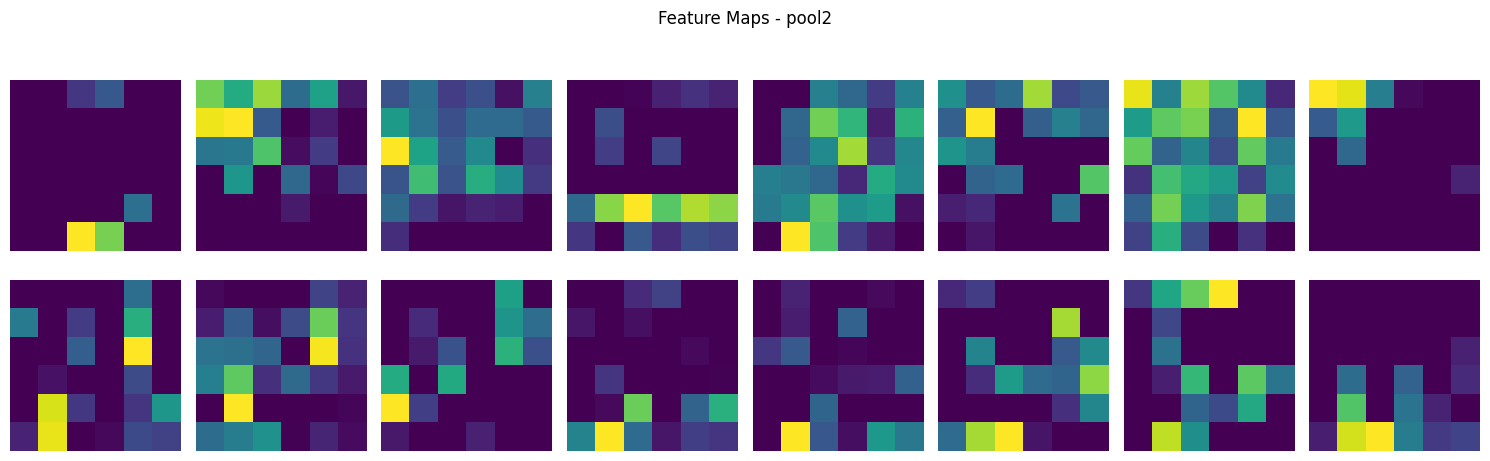

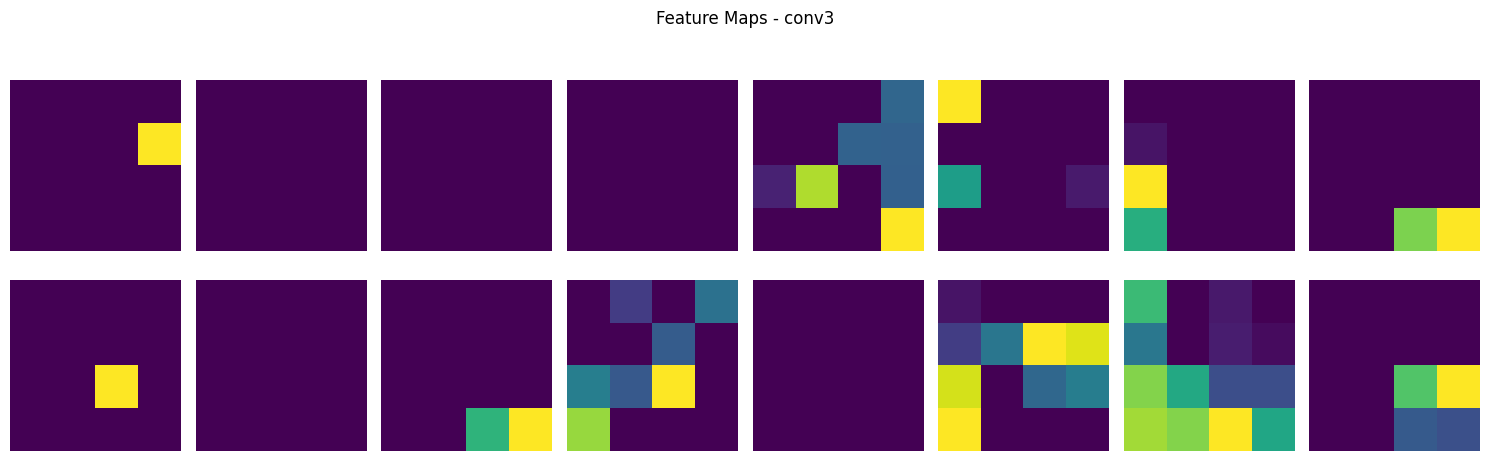

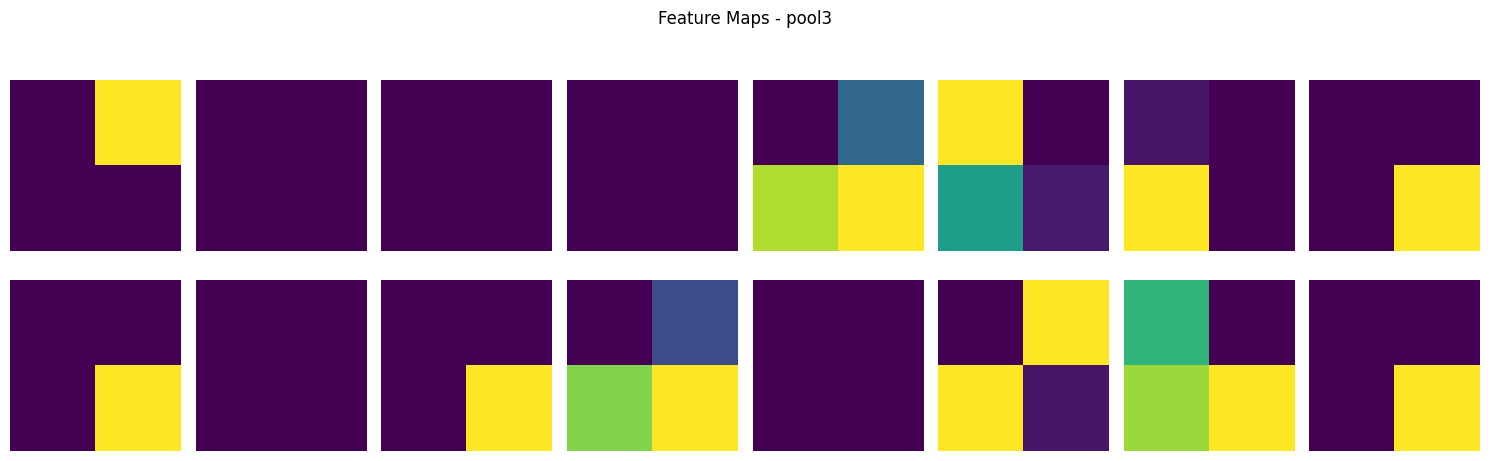

In [ ]:
# Visualize feature maps
for layer_activation, layer in zip(activations, activation_model.layers[1:]):
    num_features = layer_activation.shape[-1]
    size = layer_activation.shape[1]

    plt.figure(figsize=(15, 5))
    for i in range(min(16, num_features)):  # Show up to 16 filters
        plt.subplot(2, 8, i + 1)
        plt.imshow(layer_activation[0, :, :, i], cmap='viridis')
        plt.axis('off')
    plt.suptitle(f"Feature Maps - {layer.name}")
    plt.tight_layout()
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


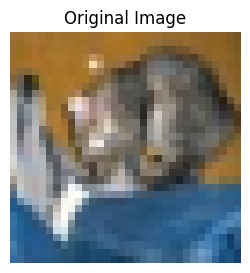

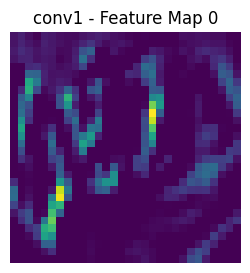

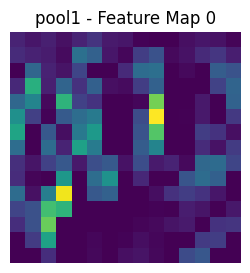

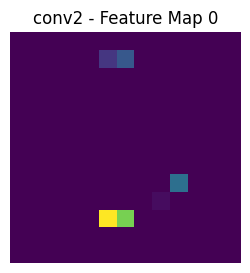

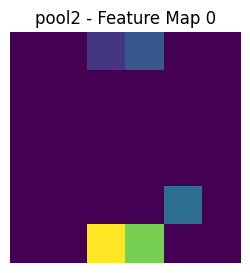

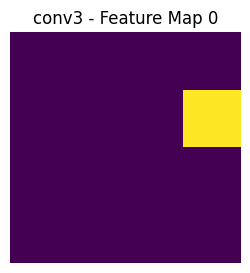

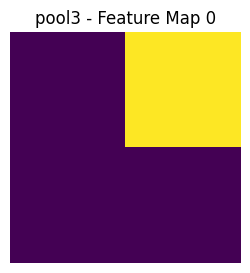

In [ ]:
# Display intermediate activations
sample_img = x_test[0].reshape(1, 32, 32, 3)
activations = activation_model.predict(sample_img)

# Plot original image
plt.figure(figsize=(3, 3))
plt.imshow(x_test[0])
plt.title("Original Image")
plt.axis('off')
plt.show()

# Plot 1 feature map from each conv/pool layer
for act, layer in zip(activations, activation_model.layers[1:]):
    feature_map = act[0, :, :, 0]  # Just the first channel

    plt.figure(figsize=(3, 3))
    plt.imshow(feature_map, cmap='viridis')
    plt.title(f"{layer.name} - Feature Map 0")
    plt.axis('off')
    plt.show()

# Rock-Paper-Scissors Image Classification using CNN



This tutorial builds a complete Convolutional Neural Network pipeline on the Rock-Paper-Scissors dataset using TensorFlow/Keras.

We'll cover:
- Data loading and preprocessing
- CNN architecture and training
- Evaluation and visualization
- Understanding intermediate feature maps

**Dataset**: Public dataset from TensorFlow Datasets (TFDS)
**Classes**: `rock`, `paper`, `scissors`


In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

## Dataset Overview

The Rock-Paper-Scissors dataset consists of 2,892 labeled images of hand gestures in three classes:
- Rock
- Paper
- Scissors

Images vary in background, lighting, and hand orientation. This is perfect for teaching CNN concepts in a real-world scenario.

In [ ]:
# Load dataset with supervised labels
(ds_train_full, ds_test), ds_info = tfds.load(
    'rock_paper_scissors',
    split=['train', 'test'],
    as_supervised=True,
    with_info=True
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/rock_paper_scissors/incomplete.LP53VO_3.0.0/rock_paper_scissors-train.tfre…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/rock_paper_scissors/incomplete.LP53VO_3.0.0/rock_paper_scissors-test.tfrec…

Dataset rock_paper_scissors downloaded and prepared to /root/tensorflow_datasets/rock_paper_scissors/3.0.0. Subsequent calls will reuse this data.


In [ ]:
# Reserve validation split from training
val_size = int(0.2 * ds_info.splits['train'].num_examples)
ds_train = ds_train_full.skip(val_size)
ds_val = ds_train_full.take(val_size)

class_names = ds_info.features['label'].names
print("Classes:", class_names)

Classes: ['rock', 'paper', 'scissors']


In [ ]:
IMG_SIZE = 150
BATCH_SIZE = 32
NUM_CLASSES = 3

def preprocess(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE)) / 255.0
    label = tf.one_hot(label, NUM_CLASSES)
    return image, label

train_aug = ds_train.map(preprocess).shuffle(1000).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
val_data = ds_val.map(preprocess).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_data = ds_test.map(preprocess).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

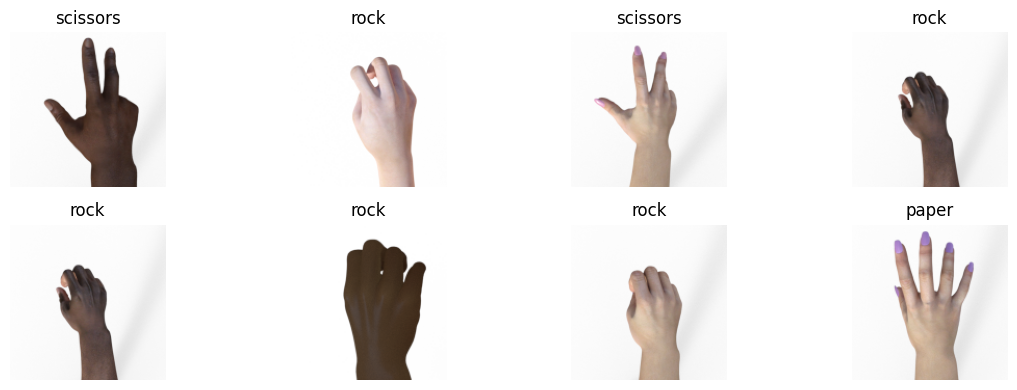

In [ ]:
for images, labels in train_aug.take(1):
    plt.figure(figsize=(12, 4))
    for i in range(8):
        plt.subplot(2, 4, i+1)
        plt.imshow(images[i].numpy())
        plt.title(class_names[tf.argmax(labels[i]).numpy()])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

## CNN Architecture

We build a manual CNN using Conv2D and MaxPooling2D layers to extract spatial features.

Layers:
- Conv2D → ReLU → MaxPool
- Conv2D → ReLU → MaxPool
- Dense → Dropout → Softmax

The model is trained using categorical crossentropy for multiclass classification.

In [ ]:
inputs = Input(shape=(IMG_SIZE, IMG_SIZE, 3))

x = Conv2D(32, (3,3), activation='relu', name='conv1')(inputs)
x = MaxPooling2D((2,2), name='pool1')(x)
x = Conv2D(64, (3,3), activation='relu', name='conv2')(x)
x = MaxPooling2D((2,2), name='pool2')(x)
x = Conv2D(128, (3,3), activation='relu', name='conv3')(x)
x = MaxPooling2D((2,2), name='pool3')(x)

x = Flatten(name='flatten')(x)
x = Dense(128, activation='relu', name='dense1')(x)
x = Dropout(0.5)(x)
outputs = Dense(NUM_CLASSES, activation='softmax', name='output')(x)

In [ ]:
model = Model(inputs, outputs)

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool1 (MaxPooling2D)            │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool2 (MaxPooling2D)            │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3 (Conv2D)                  │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool3 (MaxPooling2D)            │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,739 (18.42 MB)

 Trainable params: 4,828,739 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    train_aug,
    epochs=15,
    validation_data=val_data,
    callbacks=[EarlyStopping(patience=3, restore_best_weights=True)],
    verbose=1
)

Epoch 1/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9985 - loss: 0.0064 - val_accuracy: 0.9960 - val_loss: 0.0167
Epoch 2/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.9941 - loss: 0.0178 - val_accuracy: 0.9980 - val_loss: 0.0032
Epoch 3/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.9981 - loss: 0.0037 - val_accuracy: 0.9960 - val_loss: 0.0046
Epoch 4/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.9993 - loss: 0.0040 - val_accuracy: 0.9960 - val_loss: 0.0074
Epoch 5/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9997 - loss: 0.0024 - val_accuracy: 0.9980 - val_loss: 0.0040


Test Accuracy: 0.8790


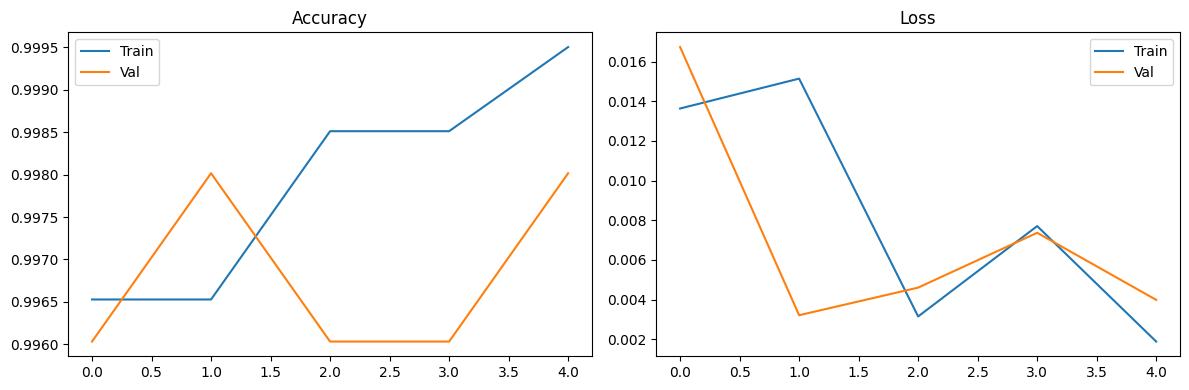

In [ ]:
# Evaluate
loss, acc = model.evaluate(test_data, verbose=0)
print(f"Test Accuracy: {acc:.4f}")

# Plot
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Val')
plt.title("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Val')
plt.title("Loss")
plt.legend()
plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 725ms/step


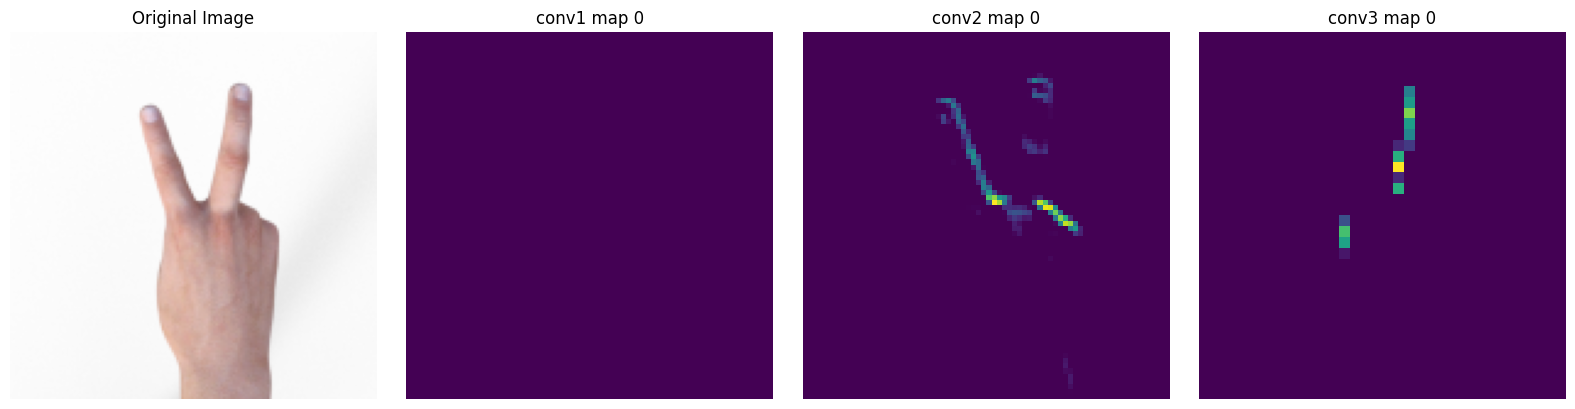

In [ ]:
# Pick a test image
for img_batch, _ in test_data.take(1):
    img = img_batch[0].numpy()
    break

# Create intermediate model for 3 conv layers
intermediate_model = Model(inputs=model.input, outputs=[
    model.get_layer('conv1').output,
    model.get_layer('conv2').output,
    model.get_layer('conv3').output
])

# Predict feature maps
feature_maps = intermediate_model.predict(img.reshape(1, IMG_SIZE, IMG_SIZE, 3))

# Plot original + 3 feature maps (1 from each conv layer) in a single horizontal row
plt.figure(figsize=(16, 4))

# Plot original
plt.subplot(1, 4, 1)
plt.imshow(img)
plt.title("Original Image")
plt.axis('off')

# Plot feature map 0 from each conv layer
for i, fmap in enumerate(feature_maps):
    plt.subplot(1, 4, i + 2)
    plt.imshow(fmap[0, :, :, 0], cmap='viridis')
    plt.title(f"conv{i+1} map 0")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
!pip install keras_tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 10.5 MB/s eta 0:00:00


In [ ]:
import keras_tuner as kt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load and preprocess data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = to_categorical(y_train, 10), to_categorical(y_test, 10)

# Step 1: Define model building function
def build_model(hp):
    model = models.Sequential()
    model.add(layers.Conv2D(
        filters=hp.Int('conv_filters', min_value=32, max_value=128, step=32),
        kernel_size=3,
        activation='relu',
        input_shape=(32, 32, 3)
    ))
    model.add(layers.MaxPooling2D(2))
    model.add(layers.Flatten())
    model.add(layers.Dense(
        units=hp.Int('dense_units', min_value=32, max_value=256, step=32),
        activation='relu'
    ))
    model.add(layers.Dropout(hp.Float('dropout', min_value=0.2, max_value=0.5, step=0.1)))
    model.add(layers.Dense(10, activation='softmax'))

    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
        ),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# Step 2: Choose tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=1,
    directory='my_tuner_dir',
    project_name='cnn_cifar10'
)

# Step 3: Start tuning
tuner.search(x_train, y_train, epochs=5, validation_split=0.2)

# Step 4: Get best model
best_model = tuner.get_best_models(num_models=1)[0]
best_hyperparams = tuner.get_best_hyperparameters(1)[0]

# Step 5: Evaluate
test_loss, test_acc = best_model.evaluate(x_test, y_test)
print("Best Test Accuracy:", test_acc)


Trial 5 Complete [00h 00m 43s]
val_accuracy: 0.5627999901771545

Best val_accuracy So Far: 0.6319000124931335
Total elapsed time: 00h 03m 13s


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6353 - loss: 1.0623
Best Test Accuracy: 0.6309999823570251


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras_tuner import RandomSearch
from tensorflow.keras.datasets import mnist
import keras_tuner as kt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical


(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
x_train=x_train/255
y_train=y_train/255
print(x_train)

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


In [ ]:
def build_model(hp):
    ac1=hp.Choice('activation1',values=['relu','sigmoid','tanh'])

    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28)))
    model.add(keras.layers.Dense(units=hp.Int('units', 32, 512, step=32), activation=ac1))
    model.add(keras.layers.Dense(10, activation='softmax'))

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

In [ ]:
# Create tuner object
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=1,
    directory='my_dir',

    project_name='mnist_tune'
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Run tuning search
tuner.search(x_train, y_train, epochs=5, validation_split=0.2)


Trial 5 Complete [00h 00m 32s]
val_accuracy: 0.09950000047683716

Best val_accuracy So Far: 0.09950000047683716
Total elapsed time: 00h 02m 44s


In [ ]:
# Get best model and hyperparameters
best_model = tuner.get_best_models(1)[0]
best_hp = tuner.get_best_hyperparameters(1)[0]

print("Best number of units:", best_hp.get('units'))
print("Best learning rate:", best_hp.get('learning_rate'))

Best number of units: 416
Best learning rate: 0.01


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Define EarlyStopping callback
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# Fit model with early stopping
history = best_model.fit(
    x_train, y_train,                # Training data
    epochs=50,                      # Max epochs (training may stop earlier)
    callbacks=[early_stop],        # Use the EarlyStopping callback
    batch_size=32                  # Batch size
)


Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.0989 - loss: 0.0000e+00
Epoch 2/50


/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.0978 - loss: 0.0000e+00
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.0993 - loss: 0.0000e+00
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.0979 - loss: 0.0000e+00
Epoch 5/50
 975/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0959 - loss: 0.0000e+00

KeyboardInterrupt: 

In [ ]:
import keras_tuner as kt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

# Load and preprocess data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = to_categorical(y_train, 10), to_categorical(y_test, 10)

# Define EarlyStopping callback
early_stop = EarlyStopping(
    monitor='val_loss',         # Stop if validation loss doesn't improve
    patience=5,                 # Wait for 5 epochs before stopping
    restore_best_weights=True  # Load the best model weights after stopping
)

# Step 1: Define model building function for the tuner
def build_model(hp):
    model = models.Sequential()
    model.add(layers.Conv2D(
        filters=hp.Int('conv_filters', min_value=32, max_value=128, step=32),
        kernel_size=3,
        activation='relu',
        input_shape=(32, 32, 3)
    ))
    model.add(layers.MaxPooling2D(2))
    model.add(layers.Flatten())
    model.add(layers.Dense(
        units=hp.Int('dense_units', min_value=32, max_value=256, step=32),
        activation='relu'
    ))
    model.add(layers.Dropout(hp.Float('dropout', min_value=0.2, max_value=0.5, step=0.1)))
    model.add(layers.Dense(10, activation='softmax'))

    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
        ),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# Step 2: Initialize tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=1,
    directory='my_tuner_dir',
    project_name='cnn_cifar10'
)

# Step 3: Search for best hyperparameters with early stopping
tuner.search(x_train, y_train,
             epochs=50,
             validation_split=0.2,
             callbacks=[early_stop])

# Step 4: Get the best model and hyperparameters
best_model = tuner.get_best_models(1)[0]
best_hp = tuner.get_best_hyperparameters(1)[0]

# Step 5: Evaluate on test data
test_loss, test_acc = best_model.evaluate(x_test, y_test)
print("Best Test Accuracy:", test_acc)
print("Best number of filters:", best_hp.get('conv_filters'))
print("Best dense units:", best_hp.get('dense_units'))
print("Best dropout:", best_hp.get('dropout'))
print("Best learning rate:", best_hp.get('learning_rate'))
